# Figure 5: ChirpEye's beat frequency benchmark for different chirp duration and angle of arrival (AoA).

In [1]:
from utils import *

color_map = sns.color_palette("cubehelix", 3).as_hex()
sns.set_theme(style="whitegrid")

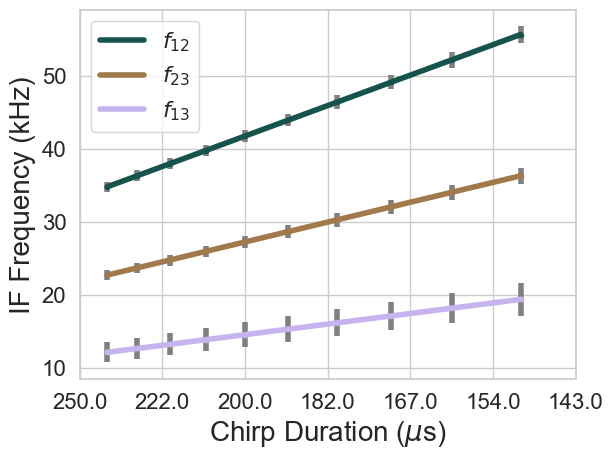

In [2]:
angle = 30 # Max angle deviation: +/- 30 degree in this plot
d = 0.1 # Antenna distance

CD = np.array([x*1e-6 for x in np.arange(150, 250, 10)])
BW = 1e9

chirp_slope = BW/CD

inch2meter = 0.0254
cable_length12 = (72-3) * inch2meter
cable_length23 = (48-3) * inch2meter
cable_length13 = (72-48) * inch2meter

cable_delay12 = cable_length12 / (0.7*c)
cable_delay23 = cable_length23 / (0.7*c)
cable_delay13 = cable_length13 / (0.7*c)

delta_f12 = chirp_slope * cable_delay12 / 1000
delta_f23 = chirp_slope * cable_delay23 / 1000
delta_f13 = chirp_slope * cable_delay13 / 1000

angle_error12 = chirp_slope * d*np.sin(np.deg2rad(angle)) / c / 1000
angle_error23 = chirp_slope * d*np.sin(np.deg2rad(angle)) / c / 1000
angle_error13 = chirp_slope * 2*d*np.sin(np.deg2rad(angle)) / c / 1000

plt.errorbar(1/CD, delta_f12, yerr=angle_error12, fmt='.', color=color_map[0],
             ecolor='gray', elinewidth=4, capsize=0)
plt.plot(1/CD, delta_f12, c=color_map[0], label="$f_{12}$", linewidth=4)

plt.errorbar(1/CD, delta_f23, yerr=angle_error12, fmt='.', color=color_map[1],
             ecolor='gray', elinewidth=4, capsize=0)
plt.plot(1/CD, delta_f23, c=color_map[1], label="$f_{23}$", linewidth=4)

plt.errorbar(1/CD, delta_f13, yerr=angle_error13, fmt='.', color=color_map[2],
             ecolor='gray', elinewidth=4, capsize=0)
plt.plot(1/CD, delta_f13, c=color_map[2], label="$f_{13}$", linewidth=4)

plt.xlabel("Chirp Duration ($\\mu$s)", fontsize=20)
plt.ylabel("IF Frequency (kHz)", fontsize=20)
loc, _ = plt.xticks()
plt.xticks(loc, np.round(1/loc*1e6), fontsize=16)
plt.yticks([10,20,30,40,50], [10,20,30,40,50], fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)